In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv('./walmart_data.csv')
df.columns = [c.lower() for c in df.columns]
df.head()

ModuleNotFoundError: No module named 'pandas'

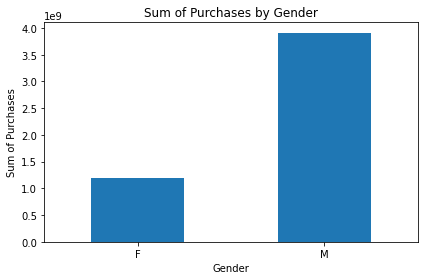

In [ ]:
total_purchase_amounts = df.groupby(['gender'])['purchase'].sum()

total_purchase_amounts.T.plot(kind='bar')
plt.title("Sum of Purchases by Gender")
plt.xlabel("Gender")
plt.ylabel("Sum of Purchases")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

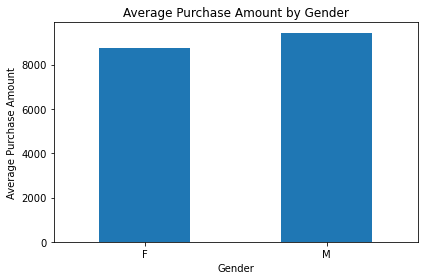

In [ ]:
average_purchase_amounts = df.groupby(['gender'])['purchase'].mean()

average_purchase_amounts.T.plot(kind='bar')
plt.title("Average Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Purchase Amount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

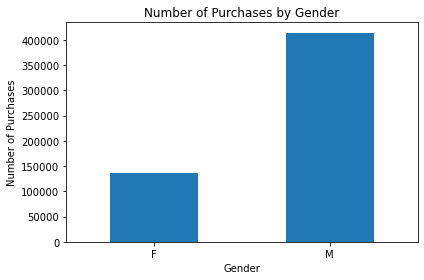

In [ ]:
total_purchases = df.groupby(['gender'])['purchase'].count()

total_purchases.T.plot(kind='bar')
plt.title("Number of Purchases by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

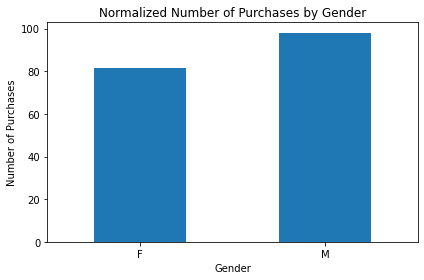

In [ ]:
average_purchases = df.groupby(['gender'])['purchase'].count()

normalized = average_purchases / num_users

normalized.T.plot(kind='bar')
plt.title("Normalized Number of Purchases by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

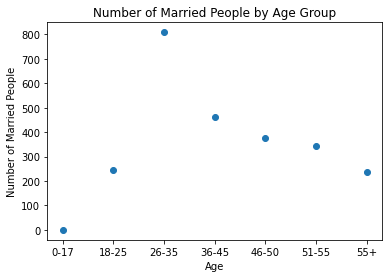

In [ ]:
age_marraige_data = df[["age", "marital_status", "user_id"]].drop_duplicates()
marriage_count = age_marraige_data.groupby("age").sum().reset_index()
plt.scatter(marriage_count["age"], marriage_count["marital_status"])
plt.xlabel("Age")
plt.ylabel("Number of Married People")
plt.title("Number of Married People by Age Group")
plt.show()

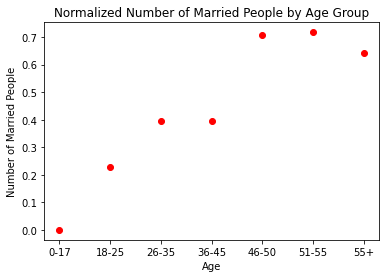

In [ ]:
age_counts = df.groupby("age")["user_id"].nunique()
marriage_count["total_people"] = marriage_count["age"].map(age_counts)
marriage_count["normalized_marriages"] = marriage_count["marital_status"] / marriage_count["total_people"]
plt.scatter(marriage_count["age"], marriage_count["normalized_marriages"], color="red")
plt.xlabel("Age")
plt.ylabel("Number of Married People")
plt.title("Normalized Number of Married People by Age Group")
plt.show()

In [ ]:
num_transactions = df.groupby(['gender'])['purchase'].count()

num_users = df.groupby(['gender'])['user_id'].nunique()

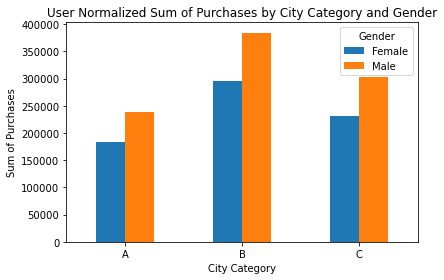

In [ ]:
purchase_amounts = df.groupby(['gender', 'city_category'])['purchase'].sum().unstack().fillna(0)

purchase_amounts_normalized = purchase_amounts.div(num_users, axis=0)

purchase_amounts_normalized.T.plot(kind='bar')

plt.title("User Normalized Sum of Purchases by City Category and Gender")
plt.xlabel("City Category")
plt.ylabel("Sum of Purchases")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.tight_layout()

plt.show()

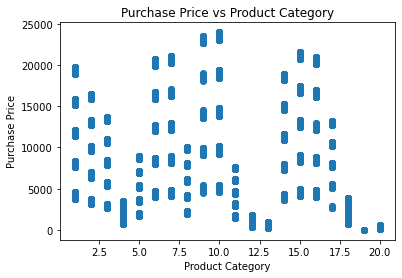

In [ ]:
purchase_and_product_cat_data = df[["purchase", "product_category"]]
plt.scatter(purchase_and_product_cat_data["product_category"], purchase_and_product_cat_data["purchase"])
plt.xlabel("Product Category")
plt.ylabel("Purchase Price")
plt.title("Purchase Price vs Product Category")
plt.show()

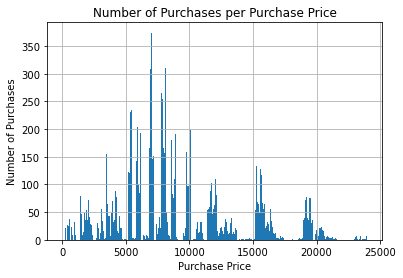

In [ ]:
df['purchase'].hist(bins=18105)
plt.xlabel("Purchase Price")
plt.ylabel("Number of Purchases")
plt.title("Number of Purchases per Purchase Price")
plt.show()

                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     8771.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:55:56   Log-Likelihood:                -79936.
No. Observations:                5891   AIC:                         1.599e+05
Df Residuals:                    5874   BIC:                         1.600e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

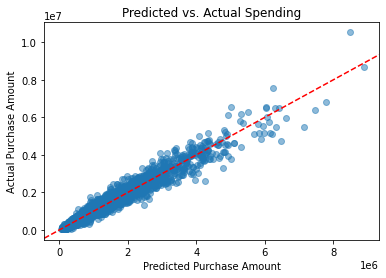

In [ ]:
features = ['gender', 'age', 'city_category', 'stay_in_current_city_years', 'marital_status']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id'])  # Remove target and ID column

# Add intercept
X = sm.add_constant(X)

# Run multiple linear regression
model = sm.OLS(Y, X).fit()

# Print the summary
print(model.summary())

plt.scatter(model.fittedvalues, Y, alpha=0.5)
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Actual Purchase Amount")
plt.title("Predicted vs. Actual Spending")
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Ideal fit line
plt.show()

                            WLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.961
Model:                            WLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 2.076e+04
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:56:04   Log-Likelihood:                -79896.
No. Observations:                5891   AIC:                         1.598e+05
Df Residuals:                    5883   BIC:                         1.599e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9944.5188   7413.207     

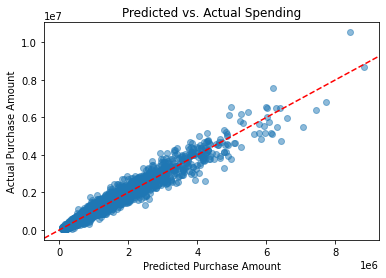

In [ ]:
user_agg_df = df.groupby(['user_id']).agg({
    'product_id': 'count',
    'purchase': 'sum',
    'occupation': 'min',
    'gender': 'min',
    'age': 'min',
    'city_category': 'min',
    'stay_in_current_city_years': 'min',
    'marital_status': 'min',
}).reset_index()

# Create dummy variables for categorical columns
features = ['gender', 'age', 'city_category']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id', 'stay_in_current_city_years', 'marital_status'])

# Add constant (intercept)
X = sm.add_constant(X)

# Drop columns with high p-values
X = X.drop(['occupation', 'age_18-25', 'age_46-50', 'age_55+'], axis=1)

# Calculate weights using inverse frequency of gender
weights = 1 / user_agg_df['gender'].map(user_agg_df['gender'].value_counts(normalize=True))

# Fit the weighted least squares model
model = sm.WLS(Y, X, weights=weights).fit()

# Print model summary
print(model.summary())

plt.scatter(model.fittedvalues, Y, alpha=0.5)
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Actual Purchase Amount")
plt.title("Predicted vs. Actual Spending")
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Ideal fit line
plt.show()

                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     272.2
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          5.05e-215
Time:                        13:56:20   Log-Likelihood:                -88904.
No. Observations:                5891   AIC:                         1.778e+05
Df Residuals:                    5886   BIC:                         1.779e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.141e+06   3.72e+04     

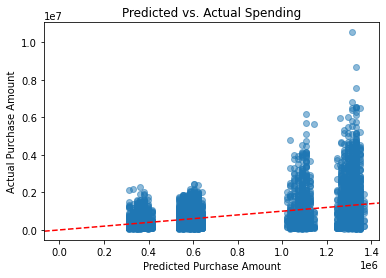

In [ ]:
def get_agg_df():
    user_agg_df = df.groupby(['user_id']).agg({
        'product_id': 'count',
        'purchase': 'sum',
        'occupation': 'min',
        'gender': 'min',
        'age': 'min',
        'city_category': 'min',
        'stay_in_current_city_years': 'min',
        'marital_status': 'min',
    }).reset_index()
    columns = user_agg_df.columns
    return user_agg_df, columns

user_agg_df, columns = get_agg_df()

one_hot_features = ['city_category', 'gender']
label_encoding_features = ['age']
df_encoded = pd.get_dummies(user_agg_df, columns=one_hot_features, drop_first=True)

age_map = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
df_encoded['encoded_age'] = df_encoded['age'].map(age_map)


Y = df_encoded['purchase']
X = df_encoded.drop(columns=[c for c in columns if c not in one_hot_features]).astype(float) # product_id is th enumber of proudcts

X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

plt.scatter(results.fittedvalues, Y, alpha=0.5)
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Actual Purchase Amount")
plt.title("Predicted vs. Actual Spending")
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Ideal fit line
plt.show()

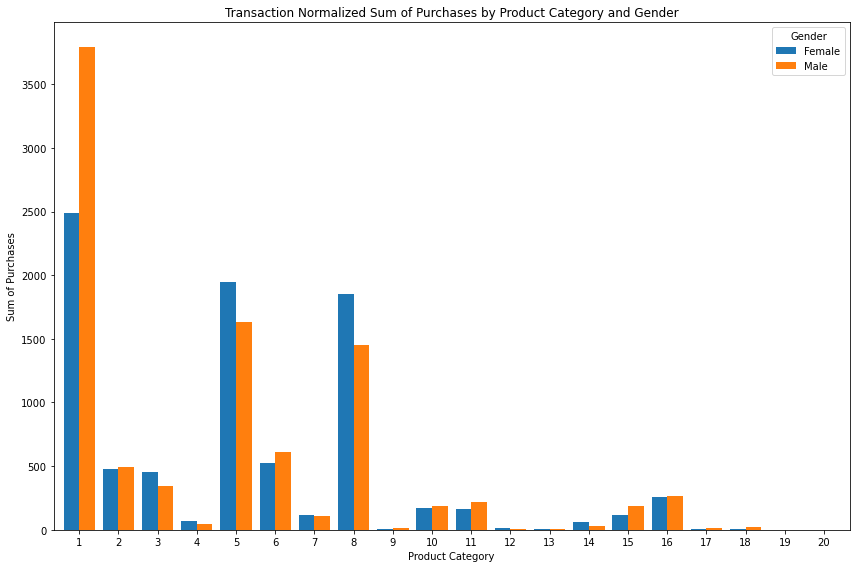

In [ ]:
# Normalized

# Group by gender and product_id to count the number of purchases
purchase_amounts = df.groupby(['gender', 'product_category'])['purchase'].sum().unstack().fillna(0)
# Normalize
purchase_amounts_normalized = purchase_amounts.div(num_transactions, axis=0)

# Plotting a grouped bar chart
purchase_amounts_normalized.T.plot(kind='bar', figsize=(12, 8), width=0.8, position=0.5)

# Adding labels and title
plt.title("Transaction Normalized Sum of Purchases by Product Category and Gender")
plt.xlabel("Product Category")
plt.ylabel("Sum of Purchases")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Count the number of transactions per (gender, product_category)
num_transactions_per_category = df.groupby(['gender', 'product_category']).size().unstack().fillna(0)

# Sum of purchases per (gender, product_category)
purchase_amounts = df.groupby(['gender', 'product_category'])['purchase'].sum().unstack().fillna(0)

# Normalize by the number of transactions in each category
purchase_amounts_normalized = purchase_amounts.div(num_transactions_per_category, axis=0)

# Plotting a grouped bar chart
purchase_amounts_normalized.T.plot(kind='bar', figsize=(12, 8), width=0.8, position=0.5)

# Adding labels and title
plt.title("Average Purchase per Transaction by Product Category and Gender")
plt.xlabel("Product Category")
plt.ylabel("Average Purchase Amount per Transaction")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.tight_layout()

# Show the plot
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

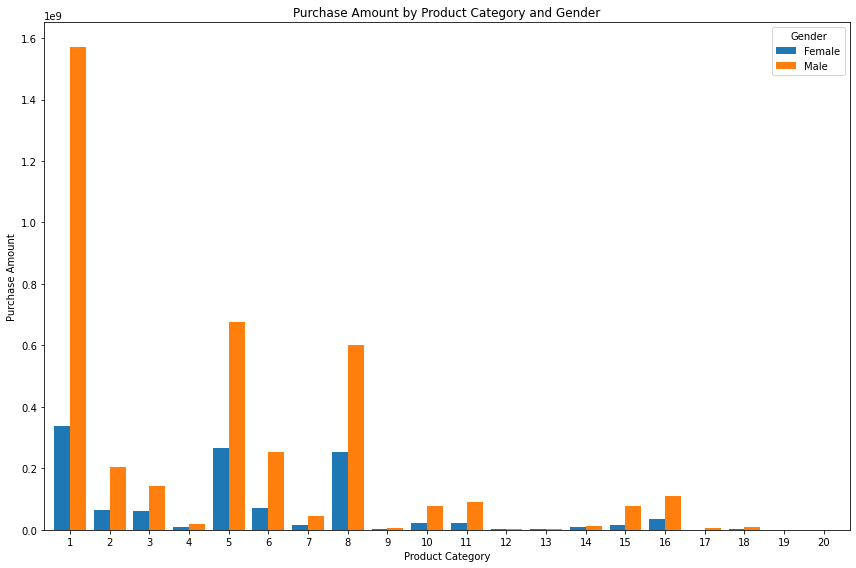

In [ ]:
# Count the number of transactions per (gender, product_category)
# num_transactions_per_category = df.groupby(['gender', 'product_category']).size().unstack().fillna(0)

# Sum of purchases per (gender, product_category)
purchase_amounts = df.groupby(['gender', 'product_category'])['purchase'].sum().unstack().fillna(0)

purchase_amounts.T.plot(kind='bar', figsize=(12, 8), width=0.8, position=0.5)

# Adding labels and title
plt.title("Purchase Amount by Product Category and Gender")
plt.xlabel("Product Category")
plt.ylabel("Purchase Amount")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.tight_layout()

# Show the plot
plt.show()

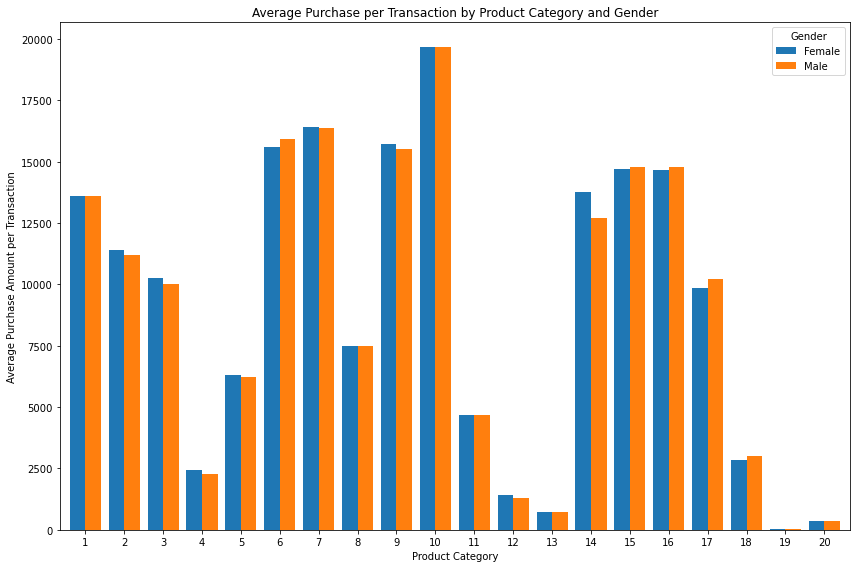

In [ ]:
import matplotlib.pyplot as plt

# Count the number of transactions per (gender, product_category)
num_transactions_per_category = df.groupby(['gender', 'product_category']).size().unstack().fillna(0)

# Sum of purchases per (gender, product_category)
purchase_amounts = df.groupby(['gender', 'product_category'])['purchase'].sum().unstack().fillna(0)

# Normalize by the number of transactions in each category
purchase_amounts_normalized = purchase_amounts.div(num_transactions_per_category, axis=0)

# Plotting a grouped bar chart
purchase_amounts_normalized.T.plot(kind='bar', figsize=(12, 8), width=0.8, position=0.5)

# Adding labels and title
plt.title("Average Purchase per Transaction by Product Category and Gender")
plt.xlabel("Product Category")
plt.ylabel("Average Purchase Amount per Transaction")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.tight_layout()

# Show the plot
plt.show()


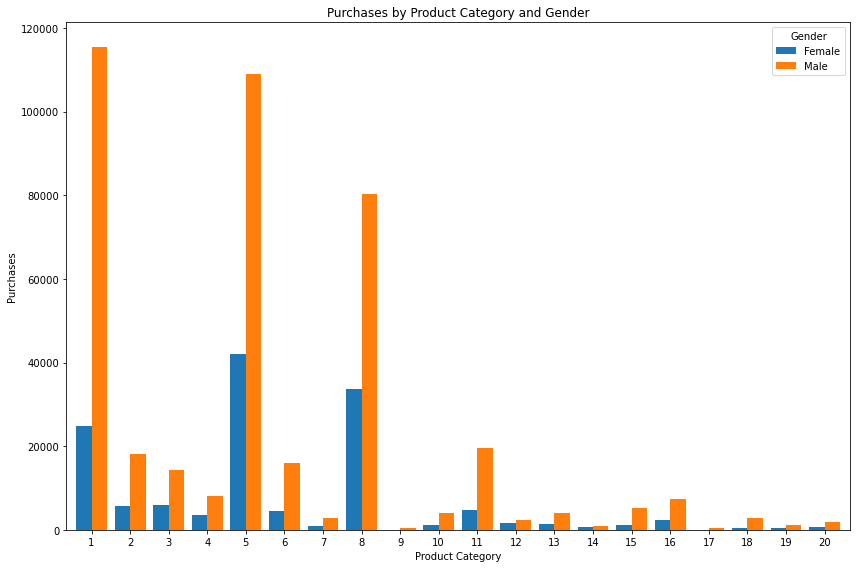

In [ ]:
# Sum of purchases per (gender, product_category)
purchase_amounts = df.groupby(['gender', 'product_category'])['purchase'].count().unstack().fillna(0)

purchase_amounts.T.plot(kind='bar', figsize=(12, 8), width=0.8, position=0.5)

# Adding labels and title
plt.title("Purchases by Product Category and Gender")
plt.xlabel("Product Category")
plt.ylabel("Purchases")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.tight_layout()

# Show the plot
plt.show()

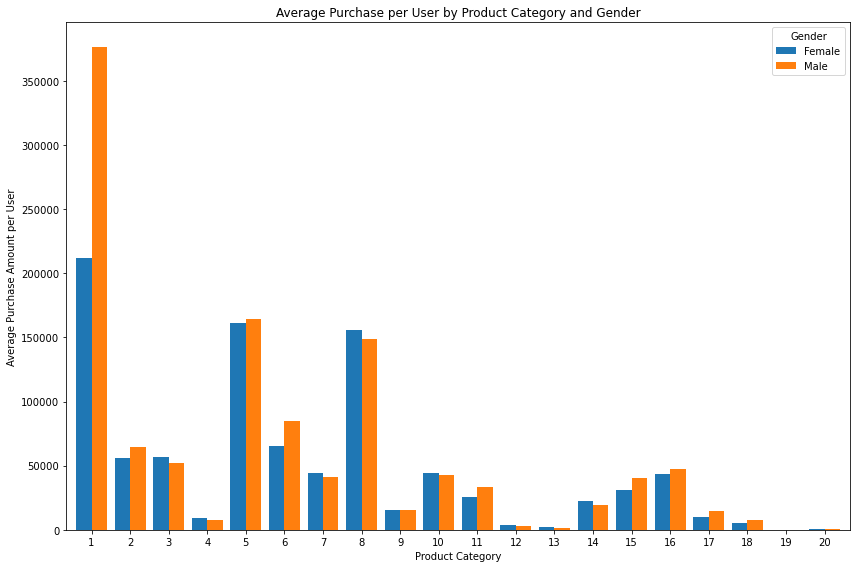

In [ ]:
import matplotlib.pyplot as plt

# Count the number of transactions per (gender, product_category)
num_users_per_category = df.groupby(['gender', 'product_category'])['user_id'].nunique().unstack().fillna(0)

# Sum of purchases per (gender, product_category)
purchase_amounts = df.groupby(['gender', 'product_category'])['purchase'].sum().unstack().fillna(0)

# Normalize by the number of transactions in each category
purchase_amounts_normalized = purchase_amounts.div(num_users_per_category, axis=0)

# Plotting a grouped bar chart
purchase_amounts_normalized.T.plot(kind='bar', figsize=(12, 8), width=0.8, position=0.5)

# Adding labels and title
plt.title("Average Purchase per User by Product Category and Gender")
plt.xlabel("Product Category")
plt.ylabel("Average Purchase Amount per User")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.tight_layout()

# Show the plot
plt.show()

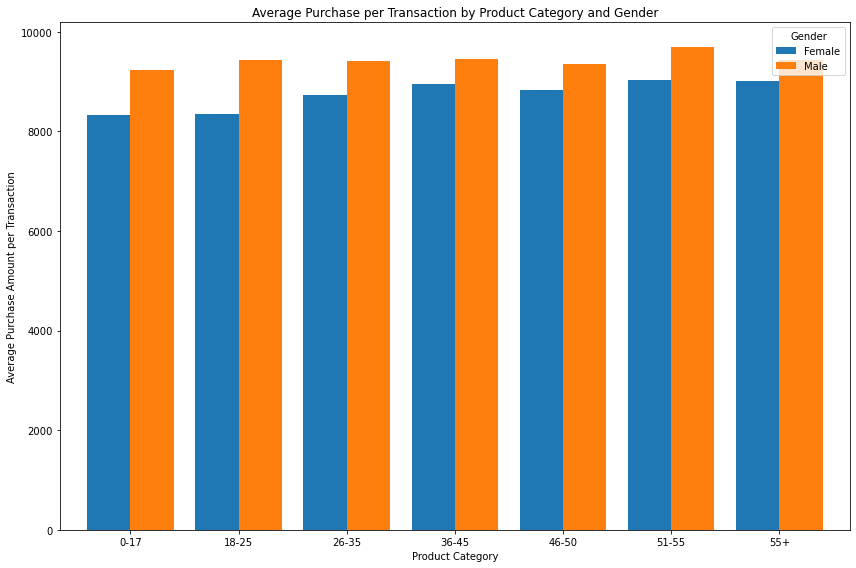

In [ ]:
import matplotlib.pyplot as plt

# Count the number of transactions per (gender, product_category)
num_transactions_per_category = df.groupby(['gender', 'age']).size().unstack().fillna(0)

# Sum of purchases per (gender, product_category)
purchase_amounts = df.groupby(['gender', 'age'])['purchase'].sum().unstack().fillna(0)

# Normalize by the number of transactions in each category
purchase_amounts_normalized = purchase_amounts.div(num_transactions_per_category, axis=0)

# Plotting a grouped bar chart
purchase_amounts_normalized.T.plot(kind='bar', figsize=(12, 8), width=0.8, position=0.5)

# Adding labels and title
plt.title("Average Purchase per Transaction by Product Category and Gender")
plt.xlabel("Product Category")
plt.ylabel("Average Purchase Amount per Transaction")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.tight_layout()

# Show the plot
plt.show()


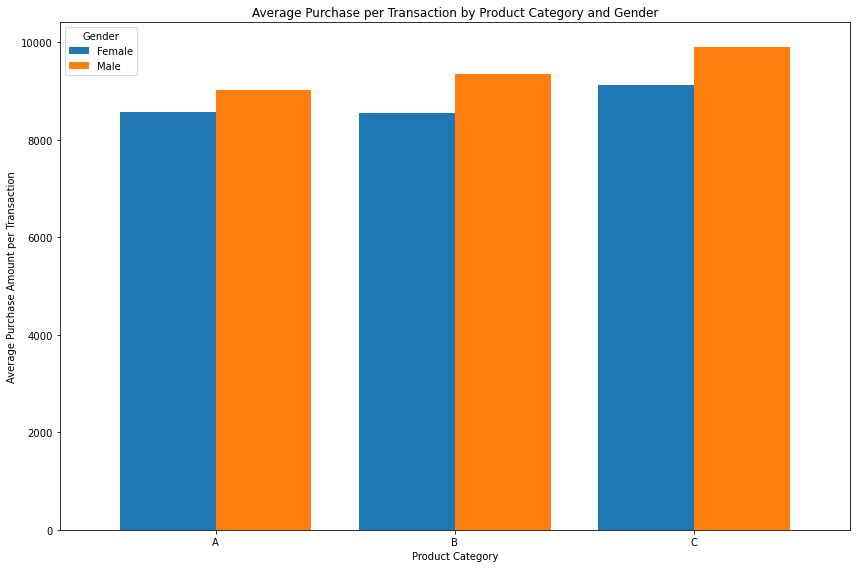

In [ ]:
import matplotlib.pyplot as plt

# Count the number of transactions per (gender, product_category)
num_transactions_per_category = df.groupby(['gender', 'city_category']).size().unstack().fillna(0)

# Sum of purchases per (gender, product_category)
purchase_amounts = df.groupby(['gender', 'city_category'])['purchase'].sum().unstack().fillna(0)

# Normalize by the number of transactions in each category
purchase_amounts_normalized = purchase_amounts.div(num_transactions_per_category, axis=0)

# Plotting a grouped bar chart
purchase_amounts_normalized.T.plot(kind='bar', figsize=(12, 8), width=0.8, position=0.5)

# Adding labels and title
plt.title("Average Purchase per Transaction by Product Category and Gender")
plt.xlabel("Product Category")
plt.ylabel("Average Purchase Amount per Transaction")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.tight_layout()

# Show the plot
plt.show()


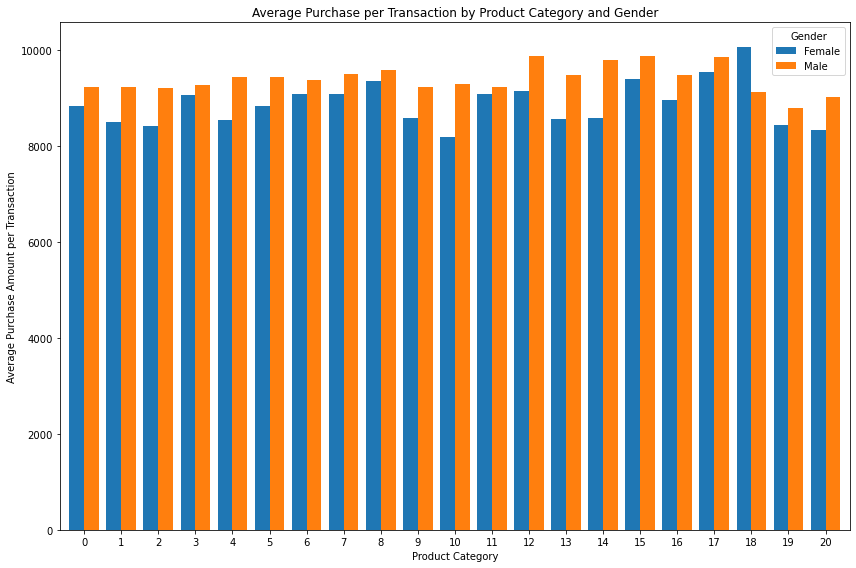

In [ ]:
import matplotlib.pyplot as plt

# Count the number of transactions per (gender, product_category)
num_transactions_per_category = df.groupby(['gender', 'occupation']).size().unstack().fillna(0)

# Sum of purchases per (gender, product_category)
purchase_amounts = df.groupby(['gender', 'occupation'])['purchase'].sum().unstack().fillna(0)

# Normalize by the number of transactions in each category
purchase_amounts_normalized = purchase_amounts.div(num_transactions_per_category, axis=0)

# Plotting a grouped bar chart
purchase_amounts_normalized.T.plot(kind='bar', figsize=(12, 8), width=0.8, position=0.5)

# Adding labels and title
plt.title("Average Purchase per Transaction by Product Category and Gender")
plt.xlabel("Product Category")
plt.ylabel("Average Purchase Amount per Transaction")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.tight_layout()

# Show the plot
plt.show()


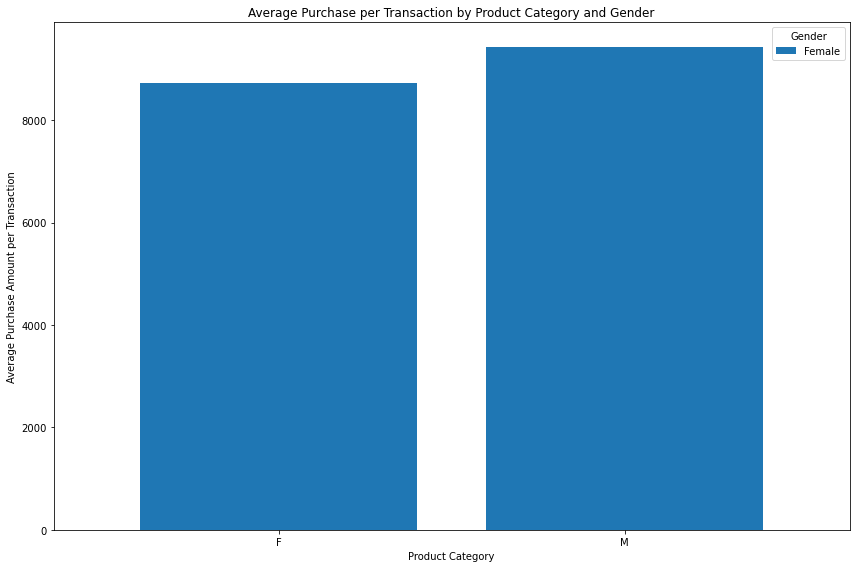

In [ ]:
import matplotlib.pyplot as plt

# Count the number of transactions per (gender, product_category)
num_transactions_per_category = df.groupby(['gender']).size().fillna(0)

# Sum of purchases per (gender, product_category)
purchase_amounts = df.groupby(['gender'])['purchase'].sum().fillna(0)

# Normalize by the number of transactions in each category
purchase_amounts_normalized = purchase_amounts.div(num_transactions_per_category, axis=0)

# Plotting a grouped bar chart
purchase_amounts_normalized.T.plot(kind='bar', figsize=(12, 8), width=0.8, position=0.5)

# Adding labels and title
plt.title("Average Purchase per Transaction by Product Category and Gender")
plt.xlabel("Product Category")
plt.ylabel("Average Purchase Amount per Transaction")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.tight_layout()

# Show the plot
plt.show()


<AxesSubplot:xlabel='occupation'>

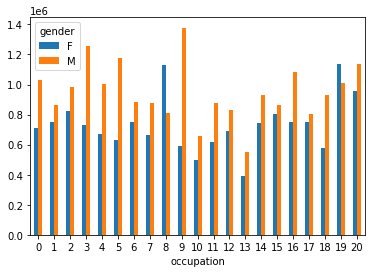

In [ ]:

df.groupby(['user_id','gender', 'occupation'])[['purchase']].sum().reset_index().groupby([
    'occupation','gender',
]).purchase.agg(['min','median', 'max','mean','std', 'count'])['mean'].unstack().plot(
    kind='bar',
    rot=0
)